In [3]:
import pickle
import numpy as np
import pandas as pd
from helper import *

In [4]:
class Model:
    name = ''
    rmse = 0.0
    model = ''
    final_model = ''

## Load the models

In [5]:
labels = pickle.load(open('models/labels.pkl', 'rb'))

baseline = Model()
baseline.name = 'baseline'
baseline.model = pickle.load(open('models/baseline.pkl', 'rb'))
baseline.final_model = pickle.load(open('final_models/baseline_final.pkl', 'rb'))

bsknn = Model()
bsknn.name = 'bsknn'
bsknn.model = pickle.load(open('models/bsknn.pkl', 'rb'))
bsknn.final_model = pickle.load(open('final_models/bsknn_final.pkl', 'rb'))

so = Model()
so.name = 'so'
so.model = pickle.load(open('models/so.pkl', 'rb'))
so.final_model = pickle.load(open('final_models/so_final.pkl', 'rb'))

svd = Model()
svd.name = 'svd'
svd.model = pickle.load(open('models/svd.pkl', 'rb'))
svd.final_model = pickle.load(open('final_models/svd_final.pkl', 'rb'))

als = Model()
als.name = 'als'
als.model = pickle.load(open('models/als.pkl', 'rb'))
als.final_model = pickle.load(open('final_models/als_final.pkl', 'rb'))

sgd = Model()
sgd.name = 'sgd'
sgd.model = pickle.load(open('models/sgd.pkl', 'rb'))
sgd.final_model = pickle.load(open('final_models/sgd_final.pkl', 'rb'))

In [8]:
globalmean = Model()
globalmean.name = 'globalmean'
globalmean.model = pickle.load(open('models/globalmean.pkl', 'rb'))
globalmean.final_model = pickle.load(open('final_models/globalmean_final.pkl', 'rb'))

usermean = Model()
usermean.name = 'usermean'
usermean.model = pickle.load(open('models/usermean.pkl', 'rb'))
usermean.final_model = pickle.load(open('final_models/usermean_final.pkl', 'rb'))

itemmean = Model()
itemmean.name = 'itemmean'
itemmean.model = pickle.load(open('models/itemmean.pkl', 'rb'))
itemmean.final_model = pickle.load(open('final_models/itemmean_final.pkl', 'rb'))

basicknn = Model()
basicknn.name = 'basicknn'
basicknn.model = pickle.load(open('models/basicknn.pkl', 'rb'))
basicknn.final_model = pickle.load(open('final_models/basicknn_final.pkl', 'rb'))

svdpp = Model()
svdpp.name = 'svdpp'
svdpp.model = pickle.load(open('models/svdpp.pkl', 'rb'))
svdpp.final_model = pickle.load(open('final_models/svdpp_final.pkl', 'rb'))

In [9]:
globalmedian = Model()
globalmedian.name = 'globalmedian'
globalmedian.model = pickle.load(open('models/globalmedian.pkl', 'rb'))
globalmedian.final_model = pickle.load(open('final_models/globalmedian_final.pkl', 'rb'))

usermedian = Model()
usermedian.name = 'usermedian'
usermedian.model = pickle.load(open('models/usermedian.pkl', 'rb'))
usermedian.final_model = pickle.load(open('final_models/usermedian_final.pkl', 'rb'))

itemmedian = Model()
itemmedian.name = 'itemmedian'
itemmedian.model = pickle.load(open('models/itemmedian.pkl', 'rb'))
itemmedian.final_model = pickle.load(open('final_models/itemmedian_final.pkl', 'rb'))

#### Compute RMSE for each model 

The ranking of the models will be done from the lower RMSE to the higher

In [10]:
def calculate_rmse(real_labels, predictions):
    """Calculate RMSE."""
    return np.linalg.norm(real_labels - predictions) / np.sqrt(len(real_labels))

In [11]:
models = [globalmean, usermean, itemmean, baseline, bsknn, basicknn, so, svd, als, sgd, svdpp, globalmedian, usermedian, itemmedian]

In [12]:
for m in models:
    m.rmse = calculate_rmse(labels, m.model)

In [13]:
import operator
sorted_models = sorted(models, key=operator.attrgetter('rmse'))

In [14]:
for m in sorted_models:
    print('Model %s : %s' % (m.name,m.rmse))

Model als : 0.9842761153117054
Model bsknn : 0.9856890199729544
Model so : 0.9969080076726844
Model svdpp : 0.9974433490996525
Model svd : 0.997766335033669
Model basicknn : 1.0218854894245444
Model sgd : 1.0228761455871391
Model usermean : 1.0277625350651283
Model itemmean : 1.0933093510076437
Model usermedian : 1.0971948682814474
Model globalmean : 1.117181294724137
Model globalmedian : 1.1257663090048857
Model itemmedian : 1.1482061792157034
Model baseline : 1.2242112307678474


## Find the number of model to put in blending

In [15]:
from sklearn.linear_model import Ridge

rmse_evolution = []

for i in range(len(sorted_models)):
    prediction = []
    k_models = sorted_models[0:i+1]
    
    for m_id, m in enumerate(k_models):
        if m_id == 0:
            prediction = m.model
        else:
            prediction = np.vstack((prediction,m.model))
        
    prediction = pd.DataFrame(prediction)
    
    if i != 0:
        prediction = np.transpose(prediction)
    
    #print(prediction.shape)
    
    # Blending
    linreg = Ridge(alpha=0.1, fit_intercept=False)
    linreg.fit(prediction, labels)
    #print(linreg.coef_) # print weight for each model
    
    rmse = calculate_rmse(labels, prediction.dot(linreg.coef_))
    print('With %s model(s) : %s' % (i+1,rmse))
    rmse_evolution.append(rmse)
    

With 1 model(s) : 0.9779485994184148
With 2 model(s) : 0.9773859442081096
With 3 model(s) : 0.9764474033068052
With 4 model(s) : 0.9763607577458013
With 5 model(s) : 0.9763290706974971
With 6 model(s) : 0.9761895096523158
With 7 model(s) : 0.9761855593988431
With 8 model(s) : 0.9760702901268534
With 9 model(s) : 0.9758706203320845
With 10 model(s) : 0.9758705221770143
With 11 model(s) : 0.975445879937087
With 12 model(s) : 0.9754458799285446
With 13 model(s) : 0.975442414794
With 14 model(s) : 0.9754411738773269


In [16]:
rmse_evolution

[0.9779485994184148,
 0.9773859442081096,
 0.9764474033068052,
 0.9763607577458013,
 0.9763290706974971,
 0.9761895096523158,
 0.9761855593988431,
 0.9760702901268534,
 0.9758706203320845,
 0.9758705221770143,
 0.975445879937087,
 0.9754458799285446,
 0.975442414794,
 0.9754411738773269]

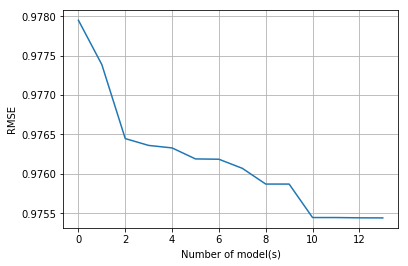

In [17]:
import matplotlib.pyplot as plt
plt.plot(range(len(rmse_evolution)),rmse_evolution)
plt.xlabel('Number of model(s)')
plt.ylabel('RMSE')

plt.grid(True)
plt.savefig("test.png", bbox_inches='tight')

plt.show()

In [18]:
best_nbrmodel = 11

## Final Blending

Define polynomial features fonction:

In [ ]:
import itertools
def polynomial_features(X, degree):
    """polynomial feature function that create a new features matrix with all combinations
    of features with degree less than or equal to the degree"""
    #get the number of samples and features from the X matrix
    nb_samples, nb_features = X.shape

    #create an iterator that lets us iterate over all combinations of numbers from 0 to nb_features-1
    combi = itertools.chain.from_iterable(
        itertools.combinations_with_replacement(range(nb_features), i) for i in range(degree + 1))

    #use that iterator to get the total number of features of the output
    nb_output = sum(1 for _ in combi)

    #initiate an empty array for the output
    PF = np.empty([nb_samples, nb_output])

    #instantiate the iterator again
    combi = itertools.chain.from_iterable(
        itertools.combinations_with_replacement(range(nb_features), i) for i in range(degree + 1))

    #create the polynomial features by iterating and multipliying the columns
    for a, b in enumerate(combi):
        PF[:, a] = X[:, b].prod(1)

    return PF

In [ ]:
from sklearn.linear_model import Ridge

prediction = []
k_models = sorted_models[0:best_nbrmodel]
    
for m_id, m in enumerate(k_models):
    if m_id == 0:
        prediction = m.model
        prediction_final = m.final_model
    else:
        prediction = np.vstack((prediction,m.model))
        prediction_final = np.vstack((prediction_final,m.final_model))
        
#prediction = pd.DataFrame(prediction)
    
if i != 0:
    prediction = np.transpose(prediction)
    prediction_final = np.transpose(prediction_final)
    
prediction = polynomial_features(prediction,2)
prediction_final = polynomial_features(prediction_final,2)
    
# Blending
linreg = Ridge(alpha=0.01, fit_intercept=False)
linreg.fit(prediction, labels)
print(linreg.coef_) # print weight for each model
    
rmse = calculate_rmse(labels, prediction.dot(linreg.coef_))

In [31]:
rmse

0.9729853439480759

#### Final prediction

In [20]:
final_result = []

for m_id in range(prediction_final.shape[1]):
    if m_id == 0:
        final_result = linreg.coef_[m_id] * prediction_final[:,m_id]
    else:
        final_result = final_result + linreg.coef_[m_id] * prediction_final[:,m_id]

print(final_result.shape)

'''
final_result = []

for m_id, m in enumerate(sorted_models):
    if m_id == 0:
        final_result = linreg.coef_[m_id] * m.final_model
    else:
        final_result = final_result + linreg.coef_[m_id] * m.final_model

print(final_result.shape)
'''

(1176952,)


Compute rmse

In [23]:
create_submission_from_prediction(final_result, "out-test-14models-spe.csv")